<a href="https://colab.research.google.com/github/tairinisantana31/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importações**

**IMPORTAÇÃO E CONCATENAÇÃO DAS BASES**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import calendar

# Importação dos arquivos
from google.colab import files
uploaded = files.upload()

# Leitura correta usando os nomes fixos dos arquivos
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Adiciona a coluna indicadora
df_train["is_train"] = True
df_test["is_train"] = False

# Concatenação das duas bases
df_full = pd.concat([df_train, df_test], ignore_index=True)

# Visualização rápida
print(df_full.head())
df_full.info()

Saving test.csv to test.csv
Saving train.csv to train.csv


<ipython-input-4-2770315277>:13: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12            1824.843333                  3  ...   
1      19114.12                    NaN                  3  ...   
2      19114.12                    NaN                  3  ...   
3      19114.12                    NaN                  3  ...   
4      19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.822620  22 

**LIMPEZA DA BASE - GERAL**

In [5]:
columns_to_clean = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment','Outstanding_Debt', 'Amount_invested_monthly','Occupation','Monthly_Balance']
for col in columns_to_clean:

    df_full[col] = df_full[col].str.replace('_', '', regex=False)

df_full_1 = df_full.drop(["Name", "SSN", "ID","Changed_Credit_Limit"], axis=1, errors="ignore")

df_full_1[df_full_1.eq('').any(axis=1)]

# # Eliminando a linha com todas as informaçôes vazias e usando a inferência de tipo da coluna
rows_with_empty_values = df_full_1[df_full_1.eq('').any(axis=1)]
df_full_1.loc[rows_with_empty_values.index] = df_full_1.loc[rows_with_empty_values.index].replace('', np.nan).infer_objects(copy=False)

df_full_1 = df_full_1.dropna(how='all')

#Colocando a variável em float
df_full_1['Outstanding_Debt'] = pd.to_numeric(df_full_1['Outstanding_Debt'], errors='coerce')




<ipython-input-5-3568515101>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_full_1.loc[rows_with_empty_values.index] = df_full_1.loc[rows_with_empty_values.index].replace('', np.nan).infer_objects(copy=False)


**LIMPEZA DA BASE - MONTH**

In [6]:
import calendar

# Criar um dicionário que mapeia nomes de meses em inglês para números
month_dict_en = {name: index for index, name in enumerate(calendar.month_name) if name}

# Opcional: Imprimir o dicionário para verificar se está correto
# print(month_dict_en)

# Mapear os nomes dos meses na coluna 'Month' para os números correspondentes em df_full_1
# Usamos .str.strip() para remover espaços em branco extras
# Usamos .str.capitalize() para garantir que a primeira letra seja maiúscula (se já não estiver)
df_full_1['Month_numeric'] = df_full_1['Month'].str.strip().str.capitalize().map(month_dict_en)

# Visualizar as primeiras linhas de df_full_1 para verificar a nova coluna
print(df_full_1[['Month', 'Month_numeric']].head())

# Verificar se há valores NaN na nova coluna de df_full_1, indicando que algum mês não foi mapeado
print("Valores NaN na coluna 'Month_numeric' em df_full_1:", df_full_1['Month_numeric'].isnull().sum())

# Se houver NaNs, vamos ver quais valores de 'Month' em df_full_1 não foram mapeados
if df_full_1['Month_numeric'].isnull().sum() > 0:
    print("\nValores de 'Month' que não foram mapeados em df_full_1:")
    print(df_full_1[df_full_1['Month_numeric'].isnull()]['Month'].unique())



      Month  Month_numeric
0   January              1
1  February              2
2     March              3
3     April              4
4       May              5
Valores NaN na coluna 'Month_numeric' em df_full_1: 0


**LIMPEZA DA BASE - AGE**

In [7]:
print(df_full_1['Age'].unique())

# Diagnóstico inicial
print("Tipo de dado da coluna 'Age':", df_full_1['Age'].dtype)
print("\nExemplos de valores únicos na coluna 'Age':")
print(df_full_1['Age'].unique()[:20])

# Identificar valores não numéricos
invalid_age = df_full_1[pd.to_numeric(df_full_1['Age'], errors='coerce').isna()]
print(f"\nTotal de valores não numéricos na coluna 'Age': {len(invalid_age)}")
print(invalid_age[['Age']])

# Converter para numérico e remover inválidos
df_full_1['Age_numeric'] = pd.to_numeric(df_full_1['Age'], errors='coerce')
df_full_1 = df_full_1.dropna(subset=['Age_numeric'])

# Substituir coluna original
df_full_1['Age'] = df_full_1['Age_numeric'].astype(int)
df_full_1.drop(columns='Age_numeric', inplace=True)

# Remover valores fora da faixa permitida
df_full_1 = df_full_1[(df_full_1['Age'] >= 18) & (df_full_1['Age'] <= 100)]

# Verificar resultado final
print("\nColuna 'Age' limpa:")
print(df_full_1['Age'].describe())

['23' '-500' '28' ... '326' '7910' '5826']
Tipo de dado da coluna 'Age': object

Exemplos de valores únicos na coluna 'Age':
['23' '-500' '28' '34' '54' '55' '21' '31' '33' '7580' '30' '24' '44' '45'
 '40' '41' '32' '35' '36' '39']

Total de valores não numéricos na coluna 'Age': 0
Empty DataFrame
Columns: [Age]
Index: []

Coluna 'Age' limpa:
count    137613.000000
mean         34.554948
std          10.147821
min          18.000000
25%          26.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: Age, dtype: float64


**LIMPEZA DA BASE - COLUNAS MONETÁRIAS**

In [8]:
colunas_dinheiro = [
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

# Função para limpar e converter texto em número
def limpa_valores(val):
    try:
        # Remove qualquer caractere que não seja número, ponto ou vírgula
        val = str(val).replace(',', '')  # Remove vírgulas como separador de milhar
        return float(val)
    except:
        return pd.NA  # Se falhar, retorna valor ausente

# Aplica a limpeza em cada coluna
for coluna in colunas_dinheiro:
    df_full_1[coluna] = df_full_1[coluna].apply(limpa_valores)

# Remove registros com valores faltantes nessas colunas, se necessário
df_full_1.dropna(subset=colunas_dinheiro, inplace=True)

# Confirma tipos e amostras
print(df_full_1[colunas_dinheiro].dtypes)
print(df_full_1[colunas_dinheiro].describe())


Annual_Income               object
Monthly_Inhand_Salary      float64
Total_EMI_per_month        float64
Amount_invested_monthly    float64
Monthly_Balance            float64
dtype: object
       Monthly_Inhand_Salary  Total_EMI_per_month  Amount_invested_monthly  \
count          101554.000000        101554.000000            101554.000000   
mean             4204.117859          1448.819884               631.809150   
std              3195.404695          8477.565636              2042.799929   
min               303.645417             0.000000                 0.000000   
25%              1633.540000            29.609095                74.383545   
50%              3079.615417            68.740789               135.203803   
75%              5980.468333           160.191974               261.563584   
max             15204.633333         82398.000000             10000.000000   

       Monthly_Balance  
count     1.015540e+05  
mean     -3.282326e+22  
std       3.307585e+24  
min     

**LIMPEZA DA BASE - OCCUPATION**

In [9]:
df_full_1['Occupation'] = df_full_1['Occupation'].replace('', np.nan)  # Converte strings vazias em NaN
df_full_1['Occupation'] = df_full_1['Occupation'].fillna('Other')     # Preenche os NaNs com 'Other'

df_full_1.Occupation.value_counts()
df_full_1.Occupation.isna().sum()
df_full_1['Occupation'].unique()


array(['Scientist', 'Other', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'MediaManager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

**LIMPEZA DA BASE - NUM_BANK_ACCOUNTS**

In [10]:
df_full_1 = df_full_1[df_full_1['Num_Bank_Accounts'] >= 0] #Retirando valores menores que 0
print(df_full_1['Num_Bank_Accounts'].describe())


count    101522.000000
mean         17.042168
std         117.713157
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64


**LIMPEZA DA BASE - NUM_OF_LOAN**

In [11]:
df_full_1['Num_of_Loan'] = df_full_1['Num_of_Loan'].fillna(0)#Preenchendo celulas vazias com 0
df_full_1['Num_of_Loan'] = df_full_1['Num_of_Loan'].astype(int)

**LIMPEZA DA BASE - TYPE_OF_LOAN**

In [12]:
#df_full_1['Type_of_Loan'].isna().sum()
df_full_1['Type_of_Loan'].unique()

# Remover espaços em excesso e repetir separação
df_full_1['Loan_List'] = df_full_1['Type_of_Loan'].str.replace(' and ', ', ', regex=False)
df_full_1['Loan_List'] = df_full_1['Loan_List'].str.split(', ')

# Remover duplicatas dentro de cada lista, lidando com NaN
# Verifica se o valor 'x' não é NaN antes de tentar criar um conjunto
df_full_1['Loan_List'] = df_full_1['Loan_List'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])

# Visualizar as primeiras linhas para verificar a nova coluna
print(df_full_1[['Type_of_Loan', 'Loan_List']].head())

# Verificar se há valores NaN na nova coluna de df_full_1
print("Valores NaN na coluna 'Loan_List' em df_full_1:", df_full_1['Loan_List'].isnull().sum())

                                        Type_of_Loan  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...   
7  Auto Loan, Credit-Builder Loan, Personal Loan,...   
8                                Credit-Builder Loan   

                                           Loan_List  
0  [Credit-Builder Loan, Personal Loan,, Auto Loa...  
4  [Credit-Builder Loan, Personal Loan,, Auto Loa...  
6  [Credit-Builder Loan, Personal Loan,, Auto Loa...  
7  [Credit-Builder Loan, Personal Loan,, Auto Loa...  
8                              [Credit-Builder Loan]  
Valores NaN na coluna 'Loan_List' em df_full_1: 0


**LIMPEZA DA BASE - NUM_OF_DELAYED_PAYMENT**

In [13]:
# Garantir que a coluna seja numérica primeiro (convertendo não numéricos para NaN)
df_full_1['Num_of_Delayed_Payment'] = pd.to_numeric(df_full_1['Num_of_Delayed_Payment'], errors='coerce')

# Converter a coluna para o tipo inteiro que aceita NaNs ('Int64')
# Usamos .astype('Int64') para fazer essa conversão para o tipo nullable integer do pandas
df_full_1['Num_of_Delayed_Payment'] = df_full_1['Num_of_Delayed_Payment'].astype('Int64')

# Verificar o novo tipo de dado da coluna
print("Novo tipo de dado da coluna 'Num_of_Delayed_Payment':", df_full_1['Num_of_Delayed_Payment'].dtype)

# Verificar a quantidade de NaNs (que devem ter sido preservados)
print("Quantidade de valores NaN na coluna 'Num_of_Delayed_Payment':", df_full_1['Num_of_Delayed_Payment'].isnull().sum())

# Opcional: Mostrar alguns valores para ver o formato (agora como inteiros ou NaN)
print("\nExemplos de valores únicos na coluna 'Num_of_Delayed_Payment' após conversão para Int64:")
print(df_full_1['Num_of_Delayed_Payment'].unique()[:10])

Novo tipo de dado da coluna 'Num_of_Delayed_Payment': Int64
Quantidade de valores NaN na coluna 'Num_of_Delayed_Payment': 7074

Exemplos de valores únicos na coluna 'Num_of_Delayed_Payment' após conversão para Int64:
<IntegerArray>
[7, <NA>, 8, 6, 4, 1, 0, 5, 3, 9]
Length: 10, dtype: Int64


**LIMPEZA DA BASE - NUM_CREDIT_INQUIRIES**

In [14]:
print(df_full_1['Num_Credit_Inquiries'].describe())
df_full_1.Num_Credit_Inquiries.isna().sum()

# Definir non_numeric antes de usá-lo
non_numeric = df_full_1[pd.to_numeric(df_full_1['Num_Credit_Inquiries'], errors='coerce').isna()]
print(non_numeric['Num_Credit_Inquiries'].unique()) #Não existe valores não númericos

df_full_1['Num_Credit_Inquiries'].fillna(0, inplace=True)

# Converte a coluna para inteiro
df_full_1['Num_Credit_Inquiries'] = df_full_1['Num_Credit_Inquiries'].astype(int)

count    99476.000000
mean        28.794021
std        196.854213
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64
[nan]


<ipython-input-14-788468048>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full_1['Num_Credit_Inquiries'].fillna(0, inplace=True)


**LIMPEZA DA BASE - CREDIT_MIX**

In [15]:
# Substituir os valores exatos com underscores ('_', '__', '___') por 'Unknown' na coluna 'Credit_Mix'.

df_full_1['Credit_Mix'] = df_full_1['Credit_Mix'].replace(['_', '__', '___'], 'Unknown')

# Verificar os valores únicos e suas contagens após a substituição para confirmar
print("Valores únicos na coluna 'Credit_Mix' após substituir underscores por 'Unknown':")
print(df_full_1['Credit_Mix'].unique())

print("\nContagem de valores na coluna 'Credit_Mix' após substituir underscores por 'Unknown':")
print(df_full_1['Credit_Mix'].value_counts(dropna=False)) # dropna=False para incluir NaNs na contagem

Valores únicos na coluna 'Credit_Mix' após substituir underscores por 'Unknown':
['Unknown' 'Good' 'Standard' 'Bad']

Contagem de valores na coluna 'Credit_Mix' após substituir underscores por 'Unknown':
Credit_Mix
Standard    36855
Good        26140
Unknown     20379
Bad         18148
Name: count, dtype: int64


**LIMPEZA DA BASE - CREDIT_HISTORY_AGE**

In [16]:
# Função de conversão
def credit_age_to_months(value):
    if pd.isna(value):
        return np.nan
    try:
        years = int(value.split(" Years")[0])
        months = int(value.split("and ")[1].split(" Months")[0])
        return years * 12 + months
    except:
        return np.nan  # Em caso de erro de formatação

# Aplicando a função
df_full_1['Credit_History_Age_Months'] = df_full_1['Credit_History_Age'].apply(credit_age_to_months)
df_full_1['Credit_History_Age_Months'] = df_full_1['Credit_History_Age_Months'].astype('Int64')

**LIMPEZA DA BASE - PAYMENT_BEHAVIOUR**

In [17]:
# Substitui o valor corrompido por NaN, sem preencher depois
df_full_1['Payment_Behaviour'] = df_full_1['Payment_Behaviour'].replace('!@9#%8', pd.NA)

# (Opcional) Verifica se o valor foi substituído corretamente
print(df_full_1['Payment_Behaviour'].value_counts(dropna=False))

Payment_Behaviour
Low_spent_Small_value_payments      25157
High_spent_Medium_value_payments    18163
High_spent_Large_value_payments     14183
Low_spent_Medium_value_payments     13970
High_spent_Small_value_payments     11646
Low_spent_Large_value_payments      10709
<NA>                                 7694
Name: count, dtype: int64


**LIMPEZA DA BASE - GERAL 2**

In [ ]:
df_full_1 = df_full_1.drop(["Customer_ID", "Month", "Type_of_Loan","Credit_History_Age"], axis=1, errors="ignore")
df_full_1['Annual_Income'] = pd.to_numeric(df_full_1['Annual_Income'], errors='coerce')
df_full_1.info()

**ANÁLISE DESCRITIVA**

Estatísticas descritivas:
                               count                       mean  \
Age                        101522.0                  34.561799   
Annual_Income              101522.0              174874.199917   
Monthly_Inhand_Salary      101522.0                4203.424297   
Num_Bank_Accounts          101522.0                  17.042168   
Num_Credit_Card            101522.0                  22.491618   
Interest_Rate              101522.0                   72.60186   
Num_of_Loan                101522.0                   3.057987   
Delay_from_due_date        101522.0                  20.602835   
Num_of_Delayed_Payment      94448.0                  30.914895   
Num_Credit_Inquiries       101522.0                  28.213727   
Outstanding_Debt           101522.0                1386.109448   
Credit_Utilization_Ratio   101522.0                  32.350608   
Total_EMI_per_month        101522.0                1448.837358   
Amount_invested_monthly    101522.0              

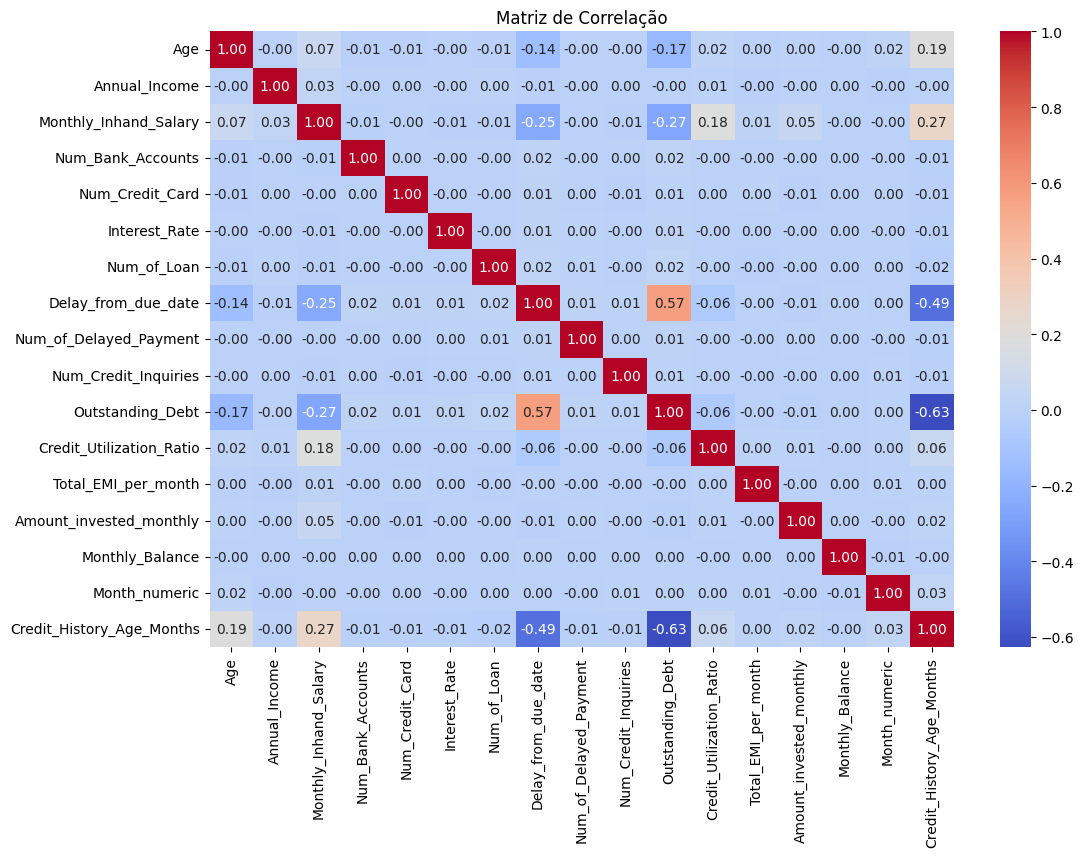

In [19]:
# Separar variáveis numéricas e categóricas
num_vars = df_full_1.select_dtypes(include=['int64', 'float64', 'Int64']).columns.tolist()
cat_vars = df_full_1.select_dtypes(include='object').columns.tolist()

# Estatísticas descritivas das variáveis numéricas
desc_stats = df_full_1[num_vars].describe().T

# Verificar valores ausentes
missing = df_full_1.isnull().sum()
missing_percent = (missing / len(df_full_1)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, '%': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='%', ascending=False)

# Calcular matriz de correlação
correlation_matrix = df_full_1[num_vars].corr()

# Exibir
print("Estatísticas descritivas:\n", desc_stats)
print("\nValores ausentes:\n", missing_df)

# Matriz de correlação visual

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

**BOXPLOTS**

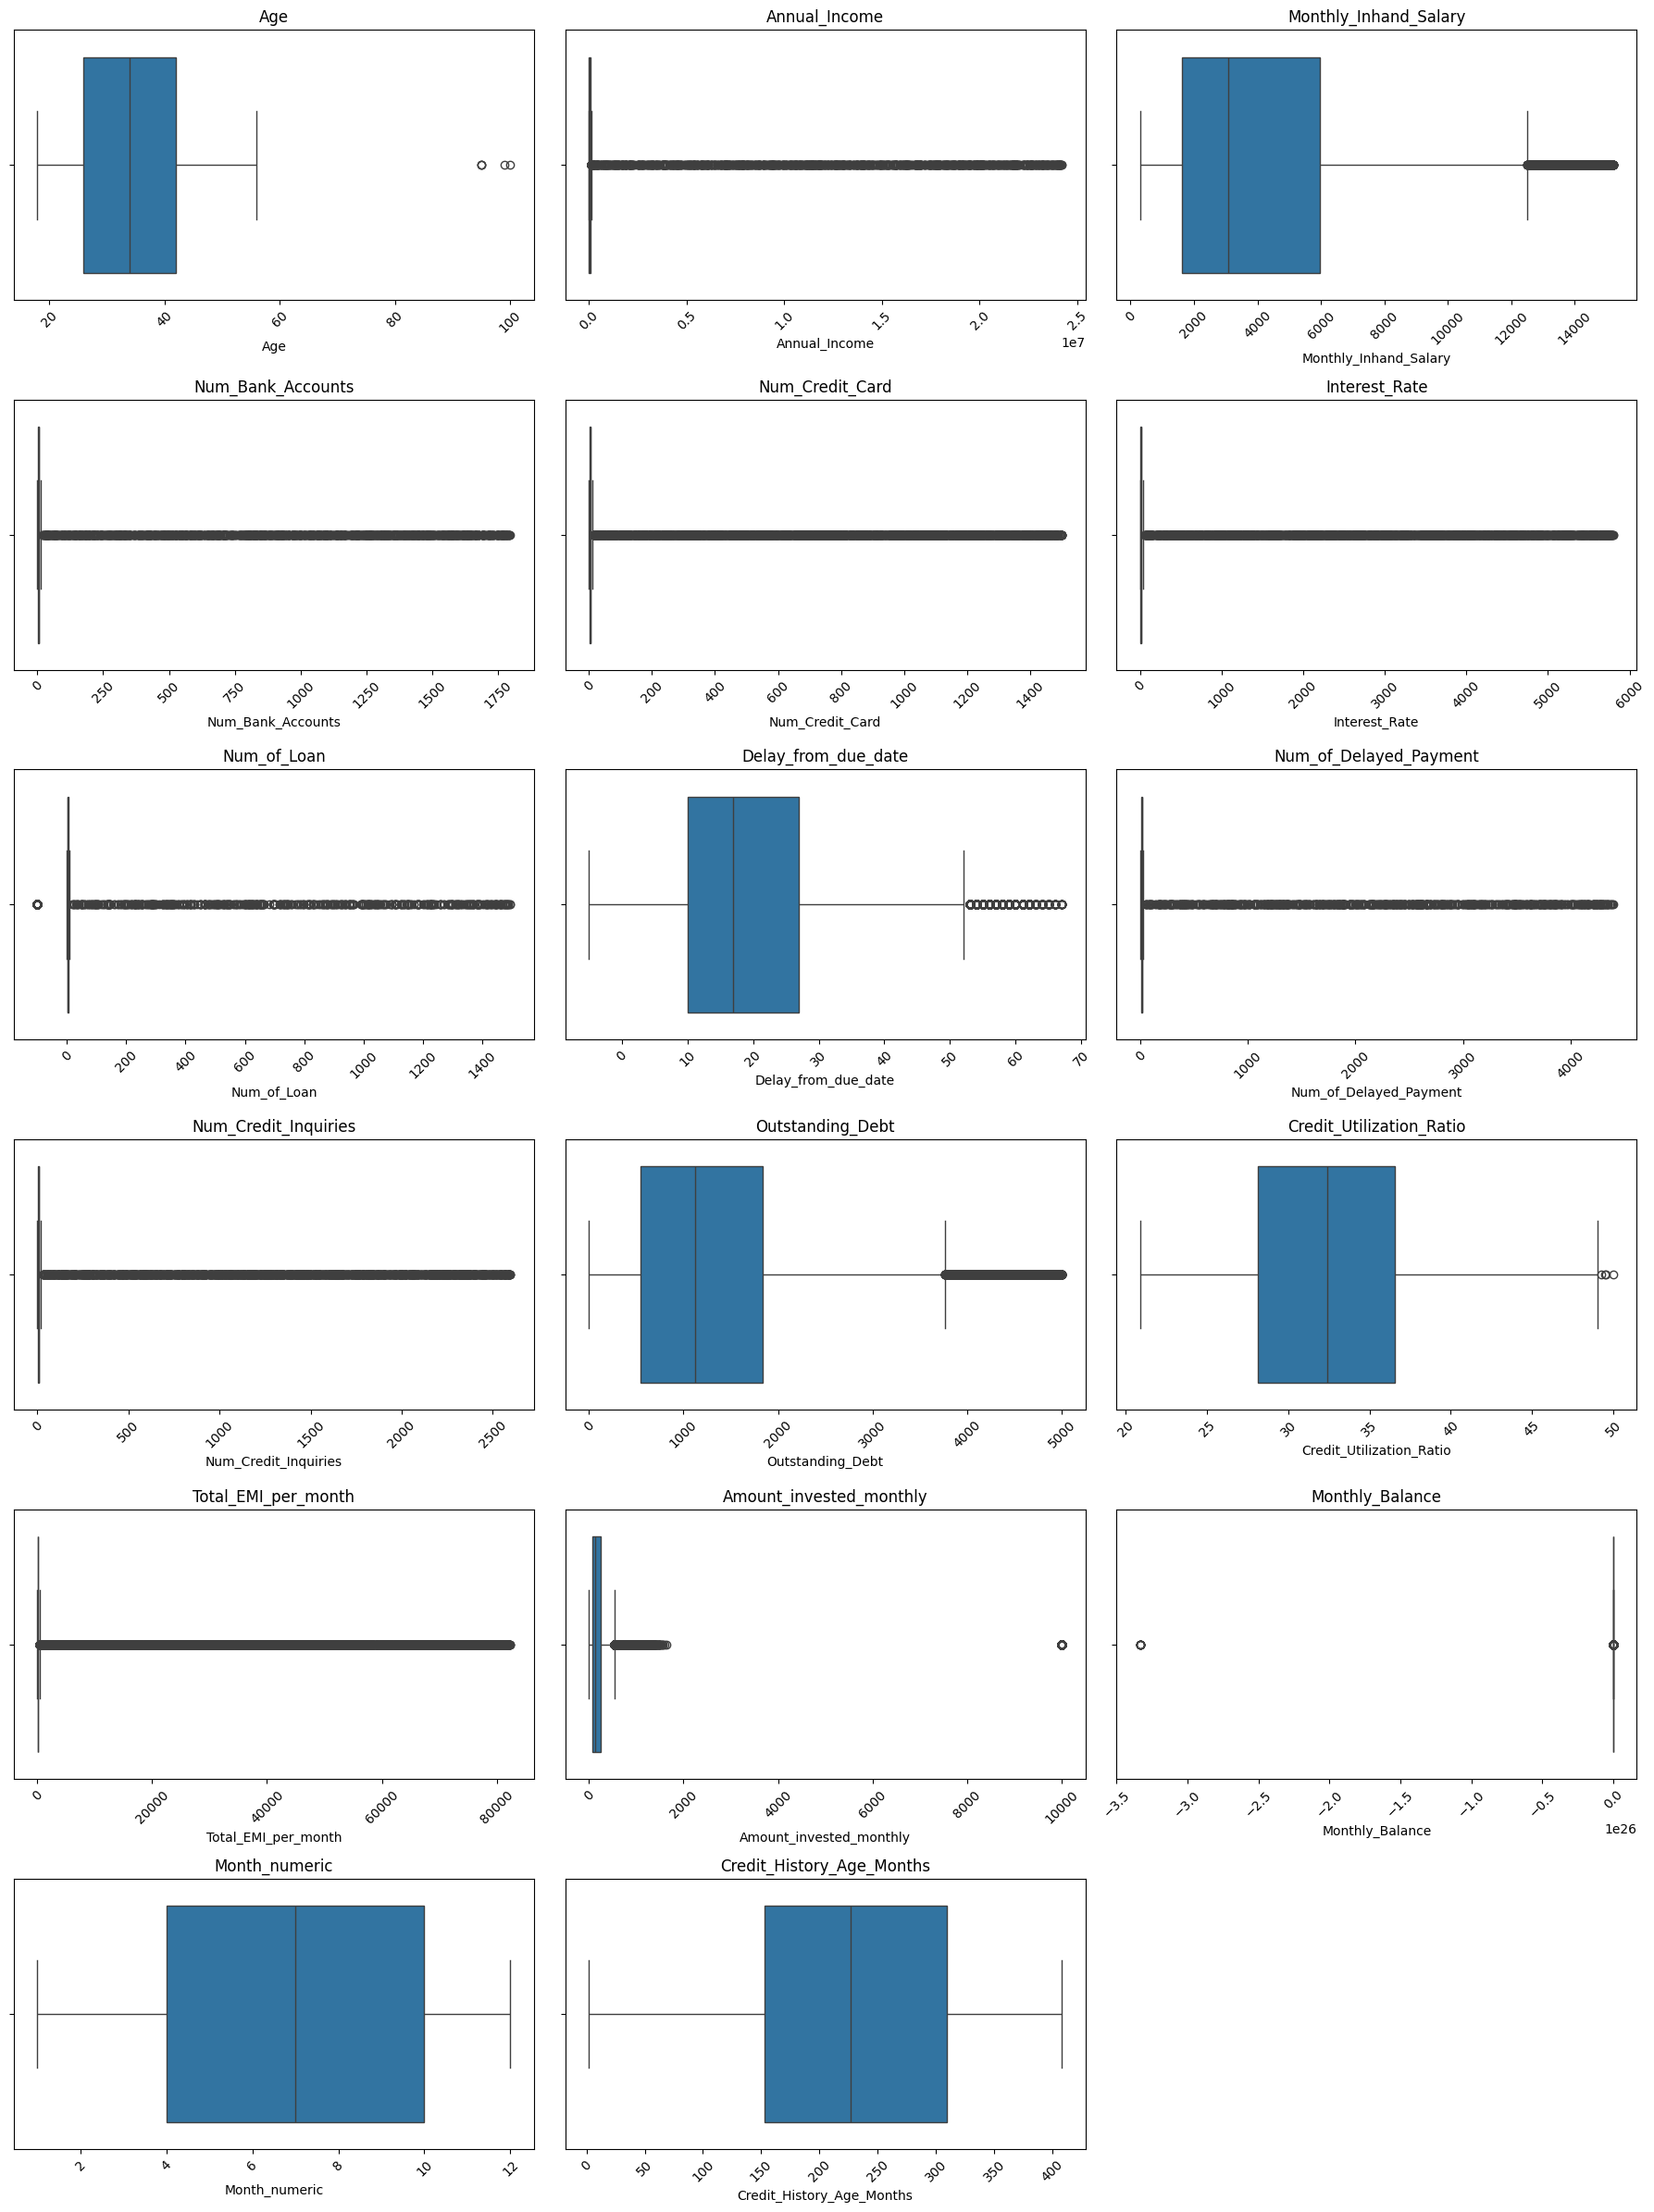

In [20]:
# Seleciona apenas colunas numéricas
cols_numericas = df_full_1.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Define o número de colunas e linhas para os subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_numericas) / n_cols))

# Tamanho total da figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Para acessar os subplots com um único índice

# Gera um boxplot para cada variável
for i, col in enumerate(cols_numericas):
    sns.boxplot(data=df_full_1, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**DISTRIBUIÇÃO DA BASE**

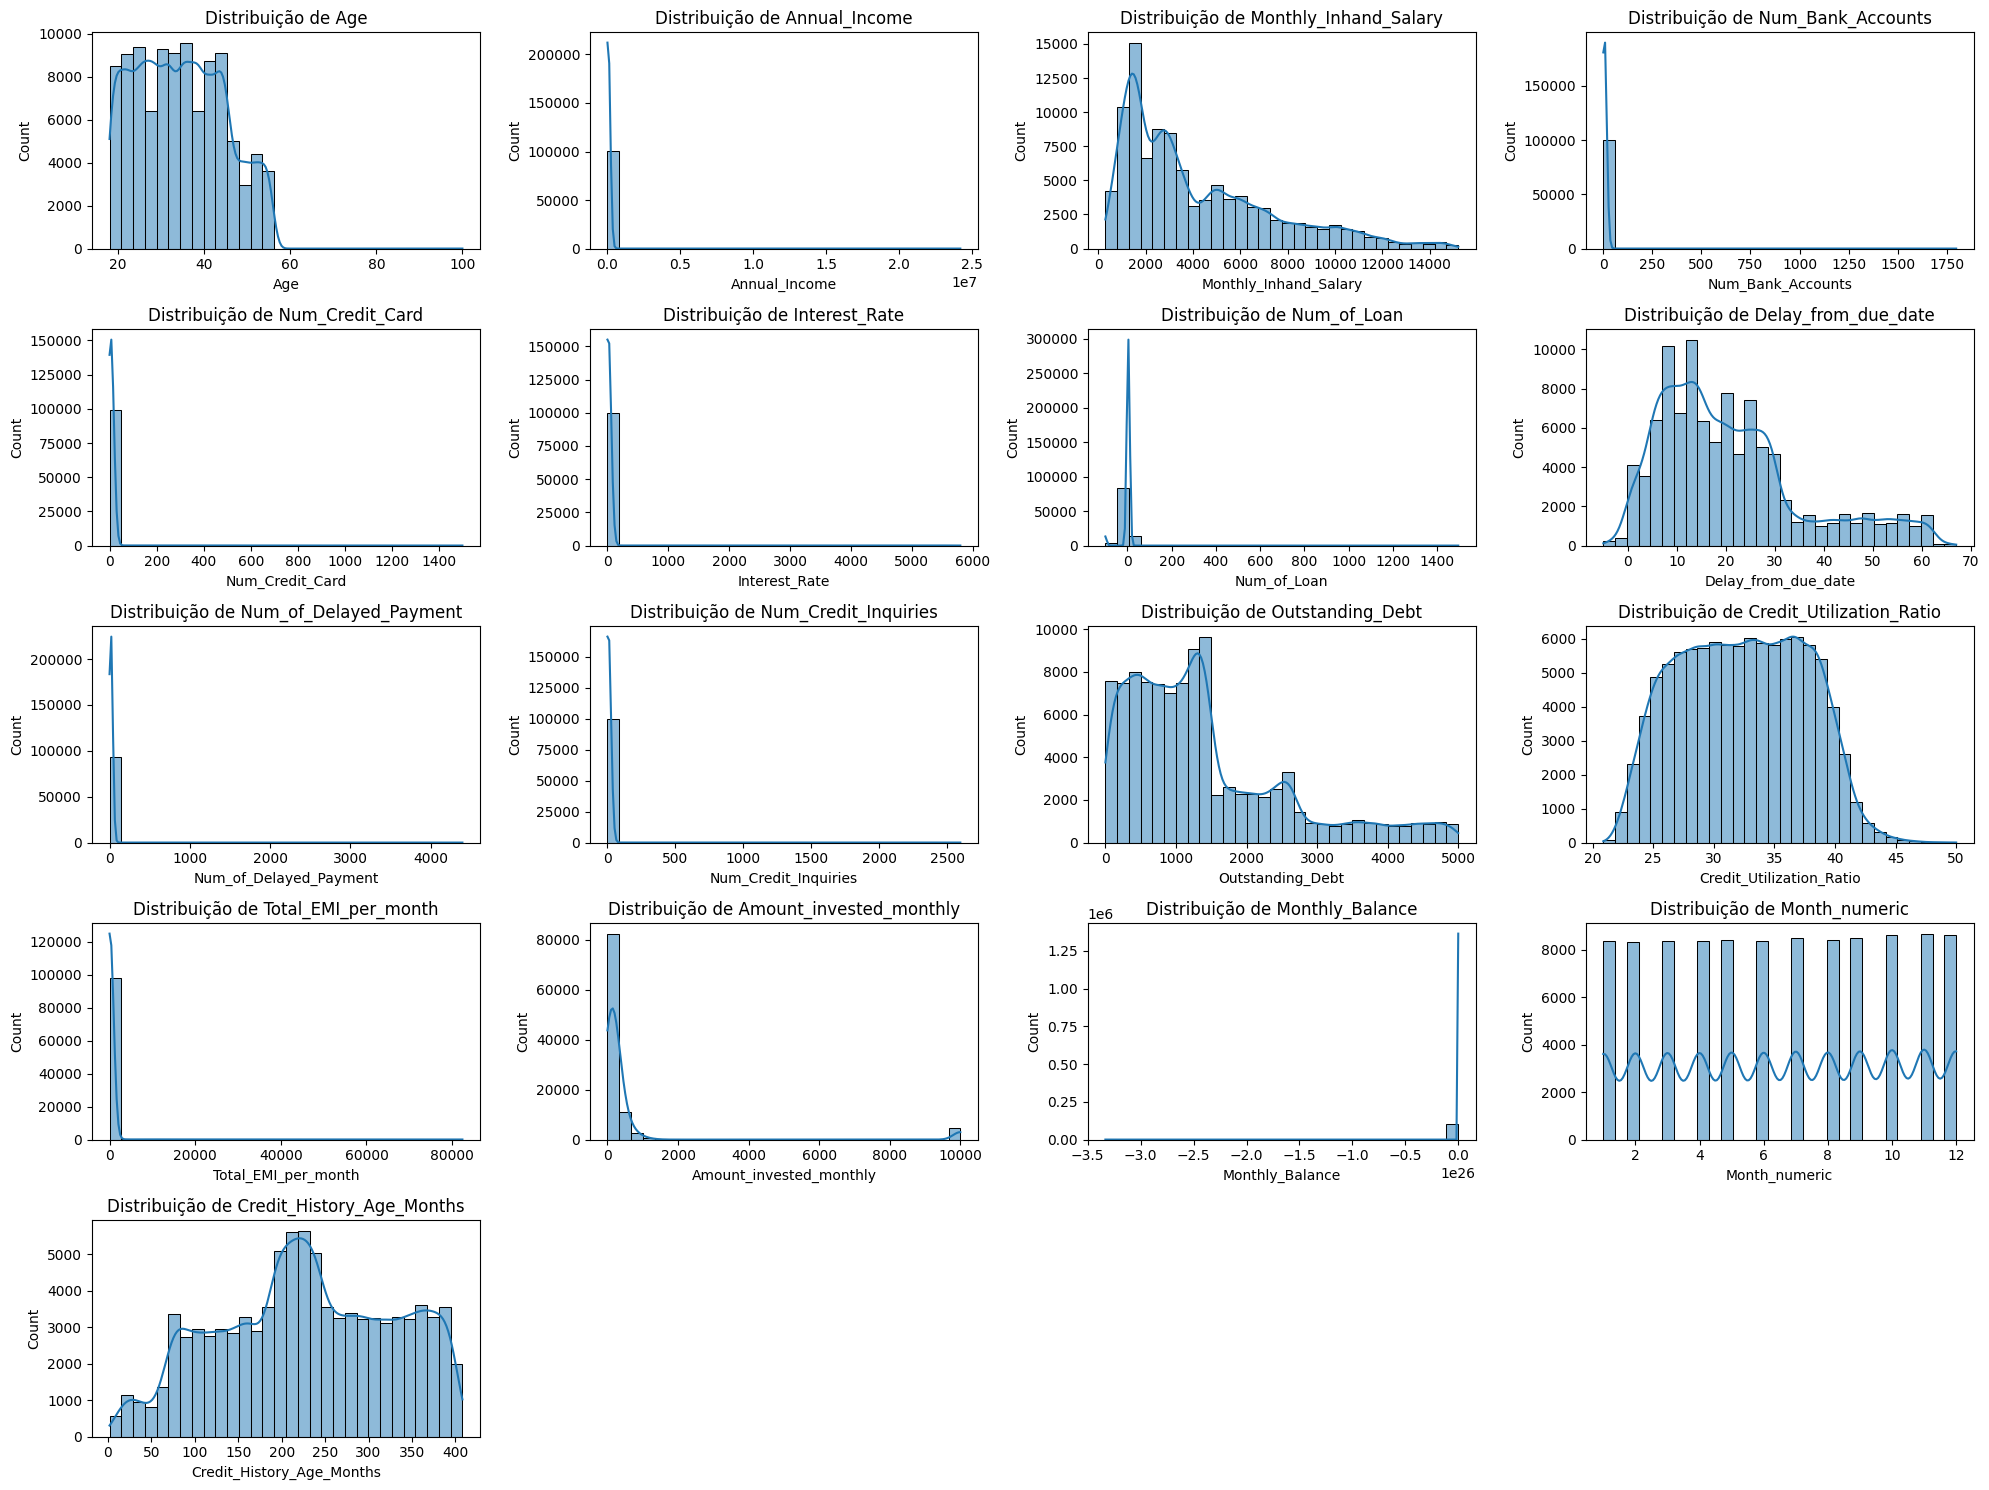

In [21]:
num_cols = df_full_1.select_dtypes(include=['int64', 'float64', 'Int64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df_full_1[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

**TRATANDO OUTLIERS**

In [22]:

# Seleciona apenas colunas numéricas
numeric_cols = df_full_1.select_dtypes(include=['float64', 'int64', 'Int64']).columns

# Dicionário para guardar quantidade de outliers por coluna
outlier_counts = {}

# Loop para cada coluna numérica
for col in numeric_cols:
    Q1 = df_full_1[col].quantile(0.25)
    Q3 = df_full_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_full_1[(df_full_1[col] < lower_bound) | (df_full_1[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Converte para DataFrame para visualização
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Num_Outliers'])
outlier_summary['%_Outliers'] = (outlier_summary['Num_Outliers'] / len(df_full_1)) * 100
outlier_summary = outlier_summary.sort_values(by='%_Outliers', ascending=False)

print(outlier_summary)

                           Num_Outliers  %_Outliers
Amount_invested_monthly           10340   10.184985
Monthly_Balance                    7564    7.450602
Total_EMI_per_month                7399    7.288075
Outstanding_Debt                   6457    6.360198
Delay_from_due_date                5542    5.458915
Num_of_Loan                        4468    4.401017
Annual_Income                      2831    2.788558
Num_Credit_Card                    2350    2.314769
Interest_Rate                      2066    2.035027
Monthly_Inhand_Salary              2017    1.986761
Num_Credit_Inquiries               1699    1.673529
Num_Bank_Accounts                  1329    1.309076
Num_of_Delayed_Payment              773    0.761411
Age                                   5    0.004925
Credit_Utilization_Ratio              4    0.003940
Month_numeric                         0    0.000000
Credit_History_Age_Months             0    0.000000


**TRATANDO OUTLIERS - 2**

In [23]:

# Cópia da base original
df_outliers = df_full_1.copy()

# ---------------------------
# 1. Remover outliers que excedem o salário mensal
# Somente se forem estatisticamente outliers
# ---------------------------
cols_compare = ['Amount_invested_monthly', 'Monthly_Balance', 'Total_EMI_per_month']
for col in cols_compare:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR

    condition = (df_outliers[col] > upper) & (df_outliers[col] > df_outliers['Monthly_Inhand_Salary'])
    df_outliers = df_outliers[~condition]

# ---------------------------
# 1.1 Tratamento específico para Monthly_Balance com erro evidente
# ---------------------------
Q1 = df_outliers['Monthly_Balance'].quantile(0.25)
Q3 = df_outliers['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remover outliers estatísticos e valores absurdos (menores que -1e6)
df_outliers = df_outliers[
    (df_outliers['Monthly_Balance'] >= lower) &
    (df_outliers['Monthly_Balance'] <= upper) &
    (df_outliers['Monthly_Balance'] > -1e6)
]

# ---------------------------
# 2. Remoção de outliers usando IQR para variáveis específicas
# ---------------------------
iqr_cols = ['Num_of_Loan', 'Annual_Income', 'Num_Credit_Card',
            'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']

for col in iqr_cols:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_outliers = df_outliers[(df_outliers[col] >= lower) & (df_outliers[col] <= upper)]

# ---------------------------
# 4. Converter Interest_Rate em porcentagem e tratar outliers
# ---------------------------
df_outliers['Interest_Rate'] = df_outliers['Interest_Rate'] / 100  # de 12 para 0.12 (12%)

Q1 = df_outliers['Interest_Rate'].quantile(0.25)
Q3 = df_outliers['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_outliers = df_outliers[(df_outliers['Interest_Rate'] >= lower) & (df_outliers['Interest_Rate'] <= upper)]

# ---------------------------
# 5. Tratar Monthly_Inhand_Salary de forma conservadora (usar 3*IQR)
# ---------------------------
Q1 = df_outliers['Monthly_Inhand_Salary'].quantile(0.25)
Q3 = df_outliers['Monthly_Inhand_Salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR
df_outliers = df_outliers[(df_outliers['Monthly_Inhand_Salary'] >= lower) & (df_outliers['Monthly_Inhand_Salary'] <= upper)]

# ---------------------------
# Resultado
# ---------------------------
print(f"Linhas restantes após remoção de outliers: {len(df_outliers)}")
print(f"Linhas removidas: {len(df_full_1) - len(df_outliers)}")



Linhas restantes após remoção de outliers: 69292
Linhas removidas: 32230


**VALIDAÇÃO APÓS TRATAMENTO DE OUTLIERS**

Análise Descritiva Final:


,count,mean,std,min,25%,50%,75%,max
Age,69292.0,34.384619,10.071638,18.0,26.0,34.0,42.0,99.0
Annual_Income,69292.0,42653.258484,29269.458219,7006.035,18665.3975,34114.02,61281.6,132753.52
Monthly_Inhand_Salary,69292.0,3542.455748,2433.627439,303.645417,1561.5775,2845.928333,5106.5925,11291.5575
Num_Bank_Accounts,69292.0,5.461655,2.566766,0.0,4.0,6.0,7.0,11.0
Num_Credit_Card,69292.0,5.587499,2.05992,0.0,4.0,5.0,7.0,11.0
Interest_Rate,69292.0,0.1477,0.087617,0.01,0.08,0.14,0.2,0.34
Num_of_Loan,69292.0,3.60919,2.429188,0.0,2.0,3.0,5.0,9.0
Delay_from_due_date,69292.0,21.448753,14.929138,-5.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,69292.0,13.545518,6.227357,-3.0,9.0,14.0,18.0,28.0
Num_Credit_Inquiries,69292.0,6.254315,4.033519,0.0,3.0,6.0,9.0,17.0



Tipos de Dados:
Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                    int64
Delay_from_due_date            int64
Num_of_Delayed_Payment         Int64
Num_Credit_Inquiries           int64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
is_train                        bool
Month_numeric                  int64
Loan_List                     object
Credit_History_Age_Months      Int64
dtype: object


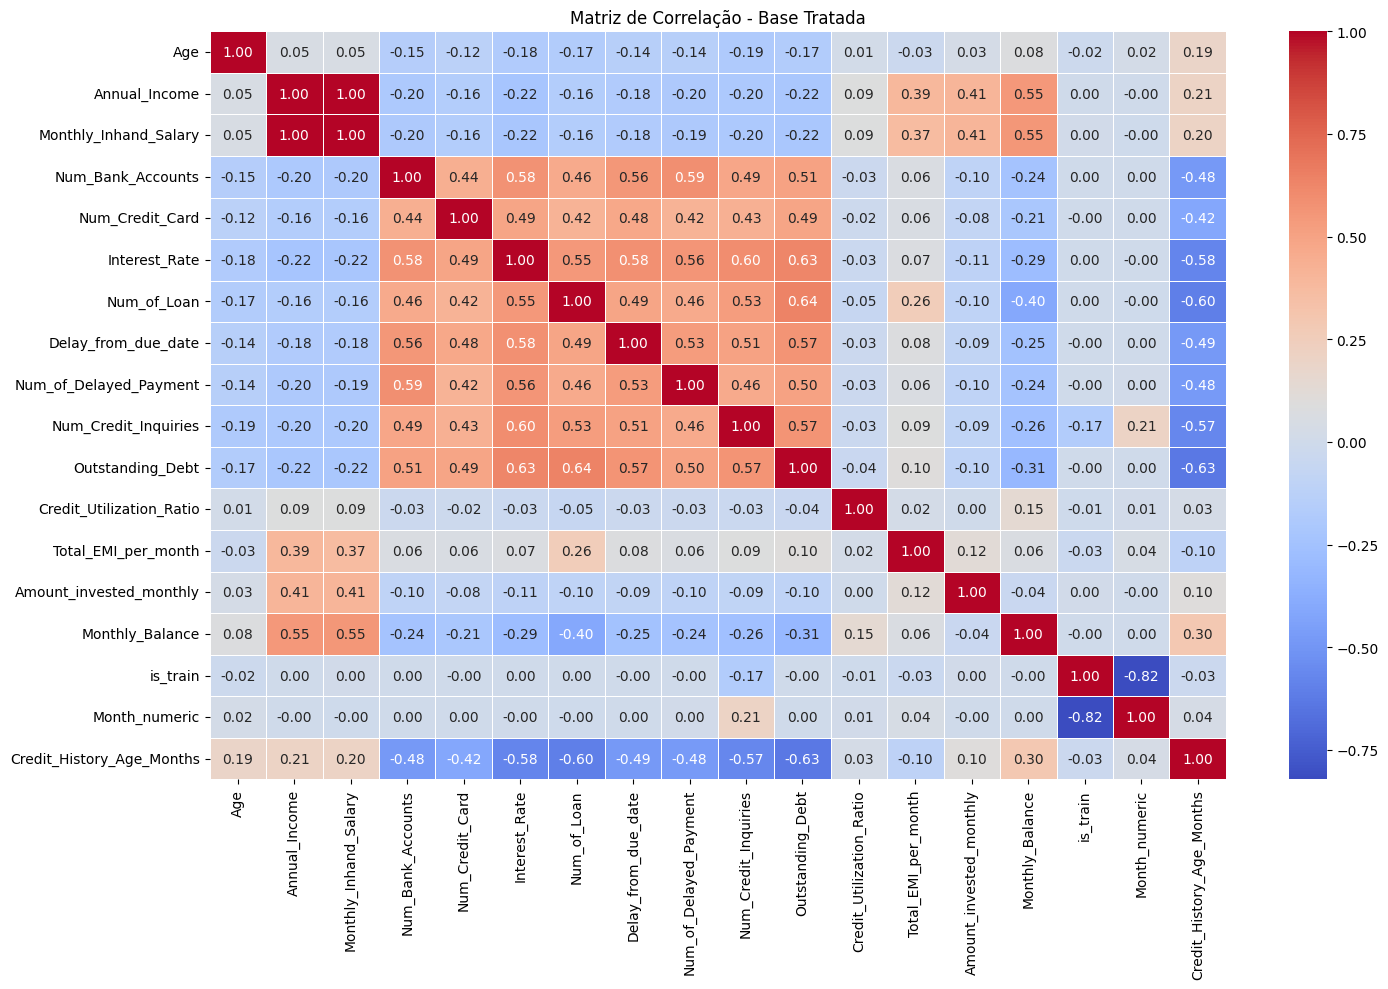

In [24]:
# Análise descritiva geral
print("Análise Descritiva Final:")
display(df_outliers.describe().T)

# Verificando tipos de dados
print("\nTipos de Dados:")
print(df_outliers.dtypes)

# Matriz de correlação
plt.figure(figsize=(15, 10))
correlation_matrix = df_outliers.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação - Base Tratada")
plt.tight_layout()
plt.show()

**BOXPLOT APÓS TRATAMENTO DE OUTLIERS**

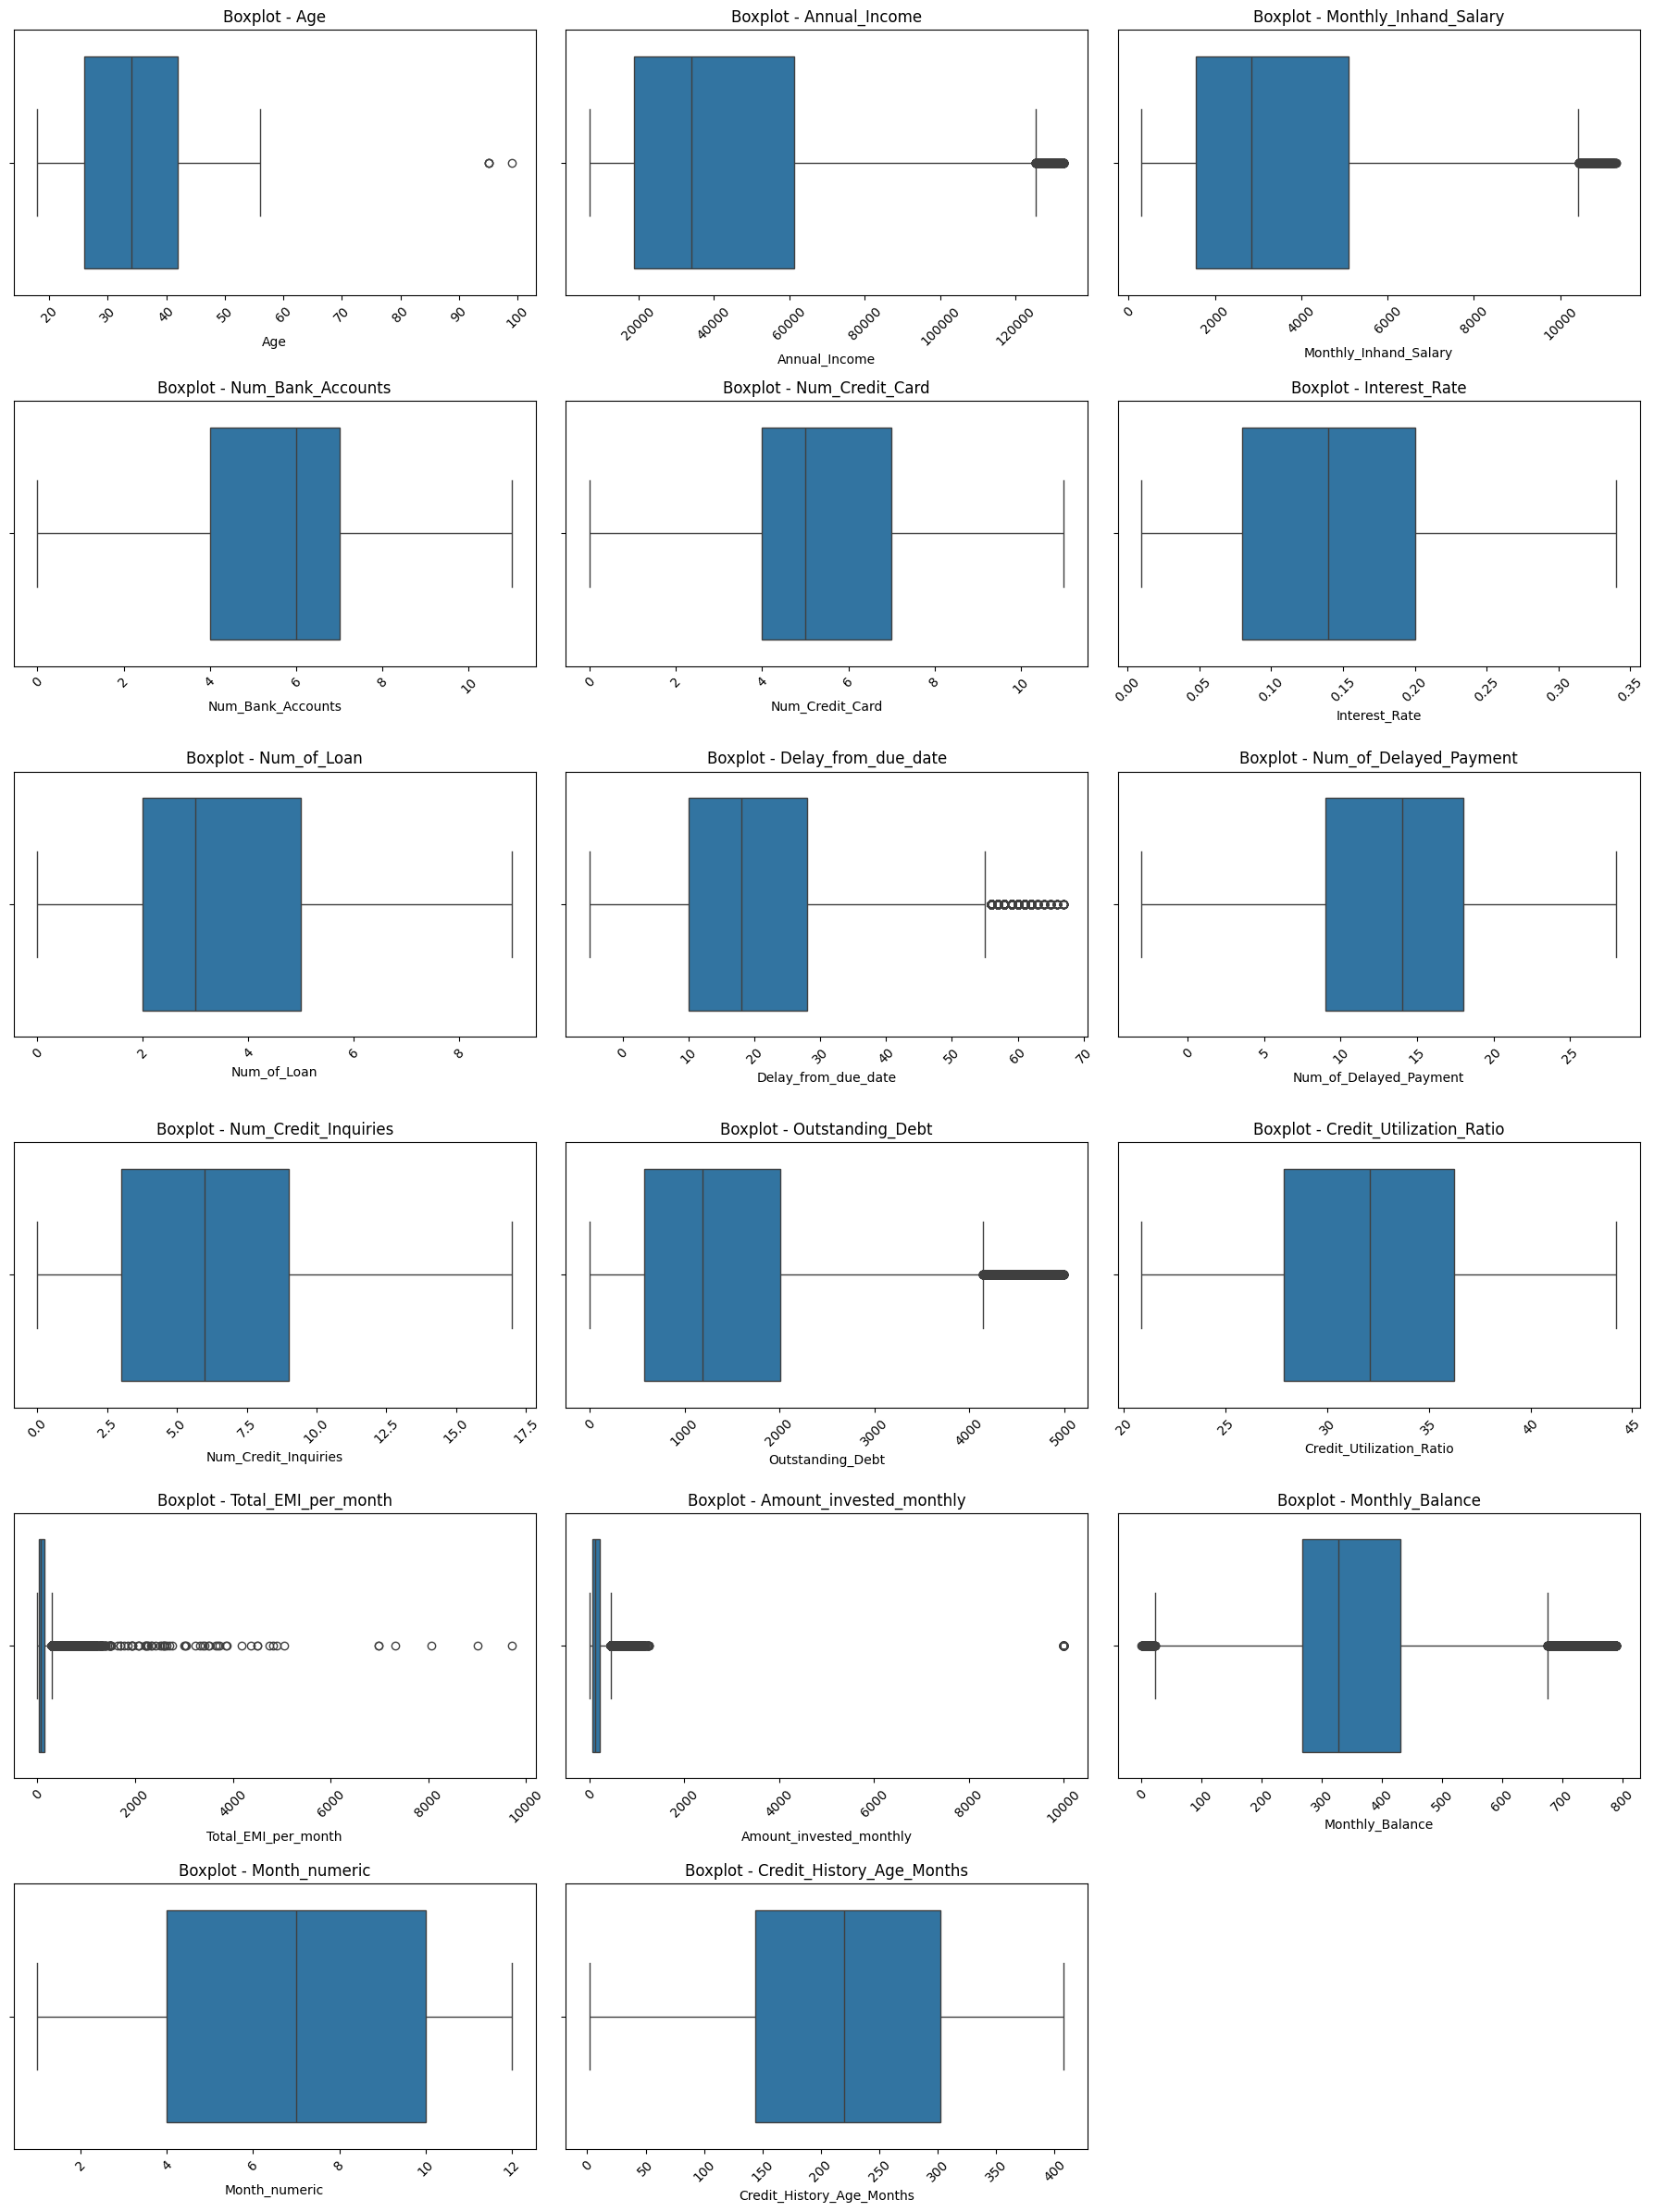

In [25]:

# Seleciona apenas colunas numéricas
cols_numericas = df_outliers.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Define o número de colunas e linhas para os subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_numericas) / n_cols))

# Tamanho total da figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Gera um boxplot para cada variável com cor padrão do seaborn
for i, col in enumerate(cols_numericas):
    sns.boxplot(data=df_outliers, x=col, ax=axes[i], color="C0")
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**VALIDAÇÃO DAS VARIÁVEIS CATEGÓRICAS**

In [26]:
# Selecionar variáveis categóricas
cat_cols = df_outliers.select_dtypes(include=['object', 'category']).columns

# Criar dicionário com frequência absoluta e relativa
for col in cat_cols:
    print(f"\n📊 Distribuição da variável: {col}")
    display(df_outliers[col].value_counts(dropna=False).to_frame(name='Frequência Absoluta'))
    display((df_outliers[col].value_counts(normalize=True, dropna=False) * 100).round(2).to_frame(name='Frequência %'))


📊 Distribuição da variável: Occupation


,Frequência Absoluta
Occupation,
Other,4843
Lawyer,4583
Mechanic,4407
Engineer,4385
Teacher,4365
Journalist,4338
Scientist,4327
Architect,4323
Doctor,4315


,Frequência %
Occupation,
Other,6.99
Lawyer,6.61
Mechanic,6.36
Engineer,6.33
Teacher,6.30
Journalist,6.26
Scientist,6.24
Architect,6.24
Doctor,6.23



📊 Distribuição da variável: Credit_Mix


,Frequência Absoluta
Credit_Mix,
Standard,25880
Good,15811
Unknown,13993
Bad,13608


,Frequência %
Credit_Mix,
Standard,37.35
Good,22.82
Unknown,20.19
Bad,19.64



📊 Distribuição da variável: Payment_of_Min_Amount


,Frequência Absoluta
Payment_of_Min_Amount,
Yes,37074
No,23981
NM,8237


,Frequência %
Payment_of_Min_Amount,
Yes,53.50
No,34.61
NM,11.89



📊 Distribuição da variável: Payment_Behaviour


,Frequência Absoluta
Payment_Behaviour,
Low_spent_Small_value_payments,18663
High_spent_Medium_value_payments,12211
Low_spent_Medium_value_payments,9655
High_spent_Small_value_payments,8193
High_spent_Large_value_payments,7721
Low_spent_Large_value_payments,7596
<NA>,5253


,Frequência %
Payment_Behaviour,
Low_spent_Small_value_payments,26.93
High_spent_Medium_value_payments,17.62
Low_spent_Medium_value_payments,13.93
High_spent_Small_value_payments,11.82
High_spent_Large_value_payments,11.14
Low_spent_Large_value_payments,10.96
<NA>,7.58



📊 Distribuição da variável: Credit_Score


,Frequência Absoluta
Credit_Score,
Standard,24507
NaN,23550
Poor,13514
Good,7721


,Frequência %
Credit_Score,
Standard,35.37
NaN,33.99
Poor,19.50
Good,11.14



📊 Distribuição da variável: Loan_List


,Frequência Absoluta
Loan_List,
[],7185
[Not Specified],882
[Personal Loan],875
[Student Loan],829
[Credit-Builder Loan],822
...,...
"[Personal Loan, Mortgage Loan,, Debt Consolidation Loan, Student Loan, Home Equity Loan, Mortgage Loan]",1
"[Payday Loan, Auto Loan,, Credit-Builder Loan, Auto Loan, Mortgage Loan]",1
"[Student Loan,, Payday Loan, Student Loan, Credit-Builder Loan]",1


,Frequência %
Loan_List,
[],10.37
[Not Specified],1.27
[Personal Loan],1.26
[Student Loan],1.20
[Credit-Builder Loan],1.19
...,...
"[Personal Loan, Mortgage Loan,, Debt Consolidation Loan, Student Loan, Home Equity Loan, Mortgage Loan]",0.00
"[Payday Loan, Auto Loan,, Credit-Builder Loan, Auto Loan, Mortgage Loan]",0.00
"[Student Loan,, Payday Loan, Student Loan, Credit-Builder Loan]",0.00


**HISTOGRAMAS**

<ipython-input-27-2706012061>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_outliers, x=col, order=order, ax=axes[i], palette="viridis")
<ipython-input-27-2706012061>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_outliers, x=col, order=order, ax=axes[i], palette="viridis")
<ipython-input-27-2706012061>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_outliers, x=col, order=order, ax=axes[i], palette="viridis")
<ipython-input-27-2706012061>:22: FutureWarning: 

Passing `palette` without assigning `hue` i

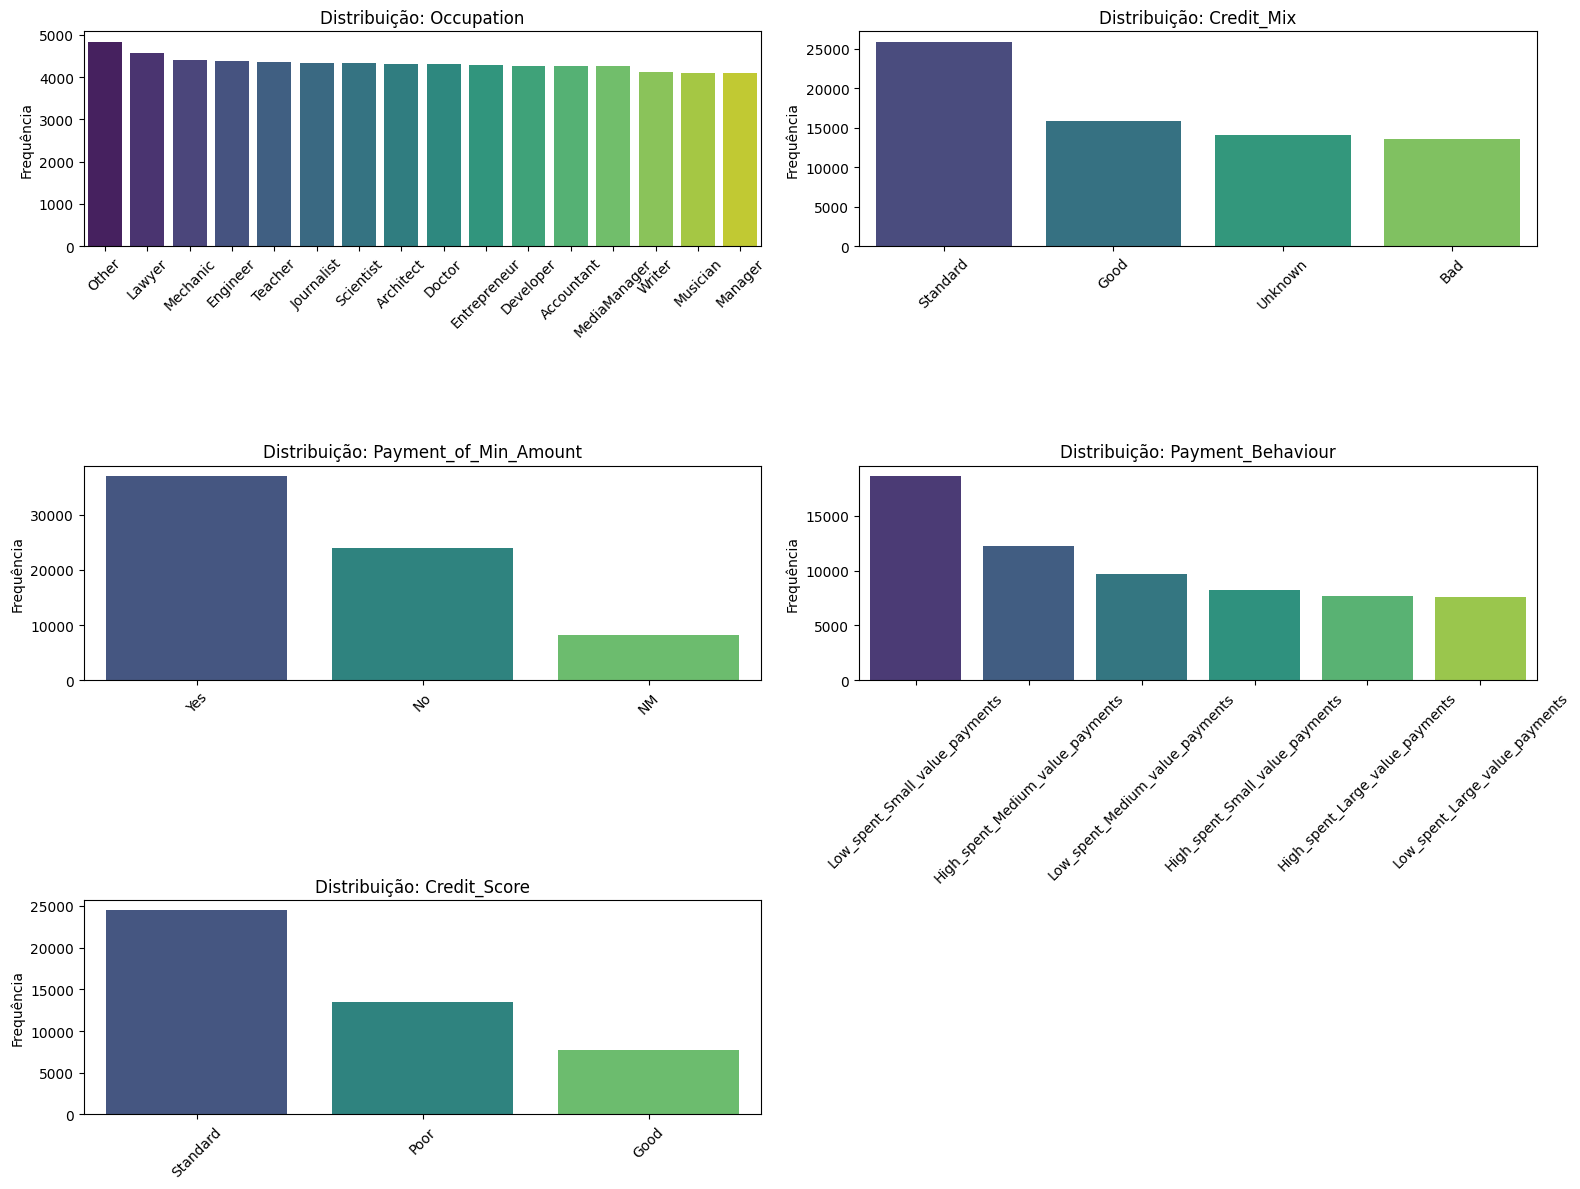

In [27]:

# Excluir a variável Loan_List do df_outliers, se ainda existir
df_outliers = df_outliers.drop("Loan_List", axis=1, errors="ignore")

# Lista de variáveis categóricas
categorical_columns = [
    "Occupation",
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour",
    "Credit_Score"
]

# Configuração da grade de subplots
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Gerar os gráficos de barras
for i, col in enumerate(categorical_columns):
    order = df_outliers[col].value_counts().index
    sns.countplot(data=df_outliers, x=col, order=order, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribuição: {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequência')

# Remover subplots vazios
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**MODELAGEM - RANDOM FOREST**

<ipython-input-29-643148135>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.astype(object).replace({pd.NA: np.nan})


Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Acurácia: 0.7672969723467046

📊 Relatório de Classificação:
               precision    recall  f1-score   support

        Good       0.66      0.70      0.68      1544
        Poor       0.77      0.76      0.77      2703
    Standard       0.80      0.79      0.80      4902

    accuracy                           0.77      9149
   macro avg       0.74      0.75      0.75      9149
weighted avg       0.77      0.77      0.77      9149



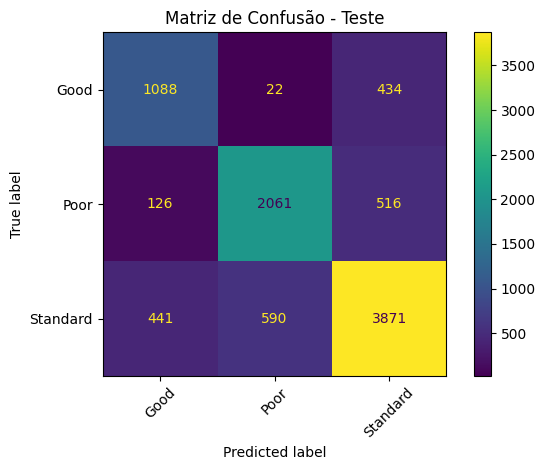

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# -----------------------------
# 1. Usar df_outliers e manter apenas linhas com is_train=True e Credit_Score não nulo
# -----------------------------
df = df_outliers.copy()
df = df[df['is_train'] == True].dropna(subset=['Credit_Score'])

# -----------------------------
# 2. Separar X e y
# -----------------------------
X = df.drop(columns=['Credit_Score', 'is_train', 'Loan_List'], errors='ignore')
y = df['Credit_Score']

# ✅ Corrigir valores ausentes representados como pd.NA
X = X.astype(object).replace({pd.NA: np.nan})

# -----------------------------
# 3. Separar treino e teste (80/20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Identificar variáveis categóricas e numéricas
# -----------------------------
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64', 'Int64', 'bool']).columns.tolist()

# -----------------------------
# 5. Pré-processamento
# -----------------------------
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# -----------------------------
# 6. Pipeline com Random Forest
# -----------------------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# -----------------------------
# 7. Ajuste de hiperparâmetros
# -----------------------------
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# -----------------------------
# 8. Avaliação no conjunto de teste
# -----------------------------
y_pred = grid_search.predict(X_test)

print("✅ Acurácia:", accuracy_score(y_test, y_pred))
print("\n📊 Relatório de Classificação:\n", classification_report(y_test, y_pred))

# -----------------------------
# 9. Matriz de confusão
# -----------------------------
cm = confusion_matrix(y_test, y_pred, labels=grid_search.best_estimator_.named_steps['model'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.named_steps['model'].classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - Teste")
plt.tight_layout()
plt.show()


**GRÁFICO DA ÁRVORE**

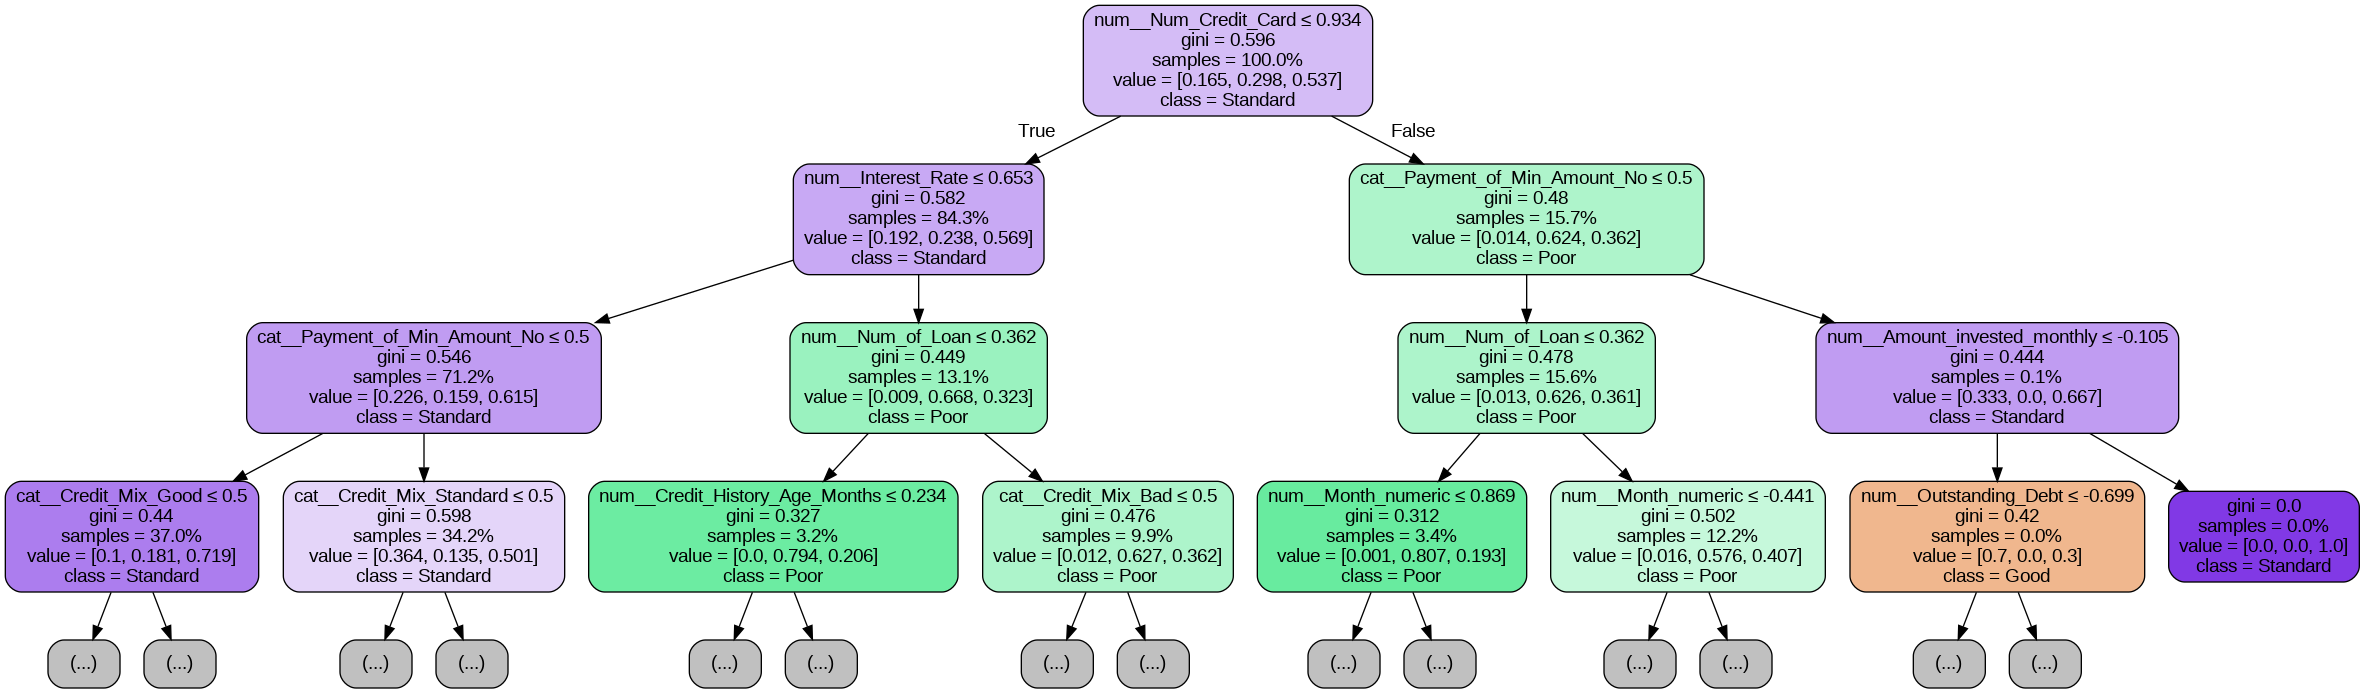

In [30]:
from sklearn.tree import export_graphviz
import graphviz

# 1. Extrair o melhor pipeline
best_pipeline = grid_search.best_estimator_

# 2. Pegar o modelo Random Forest treinado e o pré-processador
best_rf = best_pipeline.named_steps['model']
fitted_preprocessor = best_pipeline.named_steps['preprocessor']

# 3. Pegar os nomes das features transformadas
feature_names = fitted_preprocessor.get_feature_names_out()

# 4. Selecionar uma árvore da floresta
estimator = best_rf.estimators_[0]

# 5. Exportar a árvore em formato DOT
dot_data = export_graphviz(estimator,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=grid_search.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=3,
                           proportion=True)

# 6. Gerar o gráfico com Graphviz
graph = graphviz.Source(dot_data)
graph.render("arvore_random_forest_viridis", format='png', cleanup=False)

# Exibir no notebook
from IPython.display import Image
Image(filename="arvore_random_forest_viridis.png")


**IMPORTÂNCIA DAS VARIÁVEIS**

📋 Tabela de Importância das Variáveis (ordenada):


,Feature,Importance
10,num__Outstanding_Debt,0.124760
5,num__Interest_Rate,0.088511
7,num__Delay_from_due_date,0.061722
16,num__Credit_History_Age_Months,0.048078
4,num__Num_Credit_Card,0.047176
9,num__Num_Credit_Inquiries,0.043402
12,num__Total_EMI_per_month,0.039745
35,cat__Credit_Mix_Standard,0.038075
2,num__Monthly_Inhand_Salary,0.037981
1,num__Annual_Income,0.037470


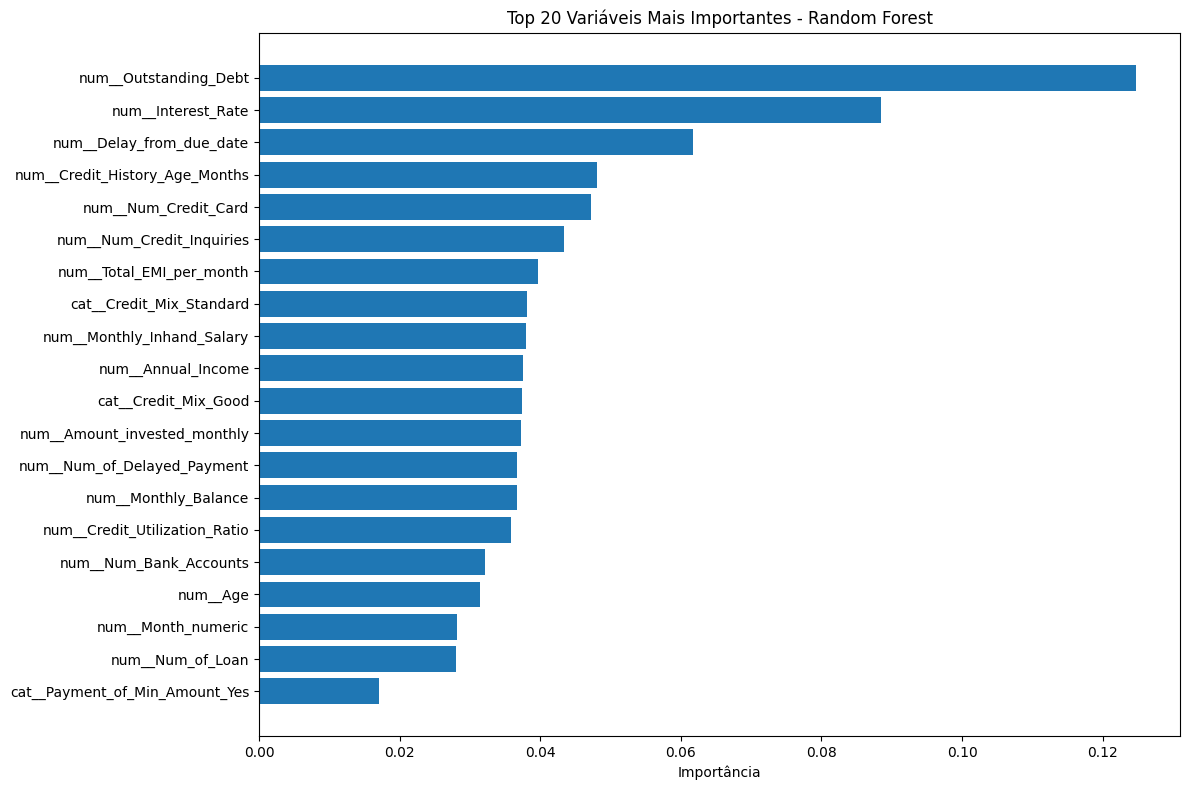

In [31]:


# Extrair o melhor modelo treinado
best_pipeline = grid_search.best_estimator_
best_rf = best_pipeline.named_steps['model']
fitted_preprocessor = best_pipeline.named_steps['preprocessor']

# Obter os nomes das variáveis após transformação
feature_names = fitted_preprocessor.get_feature_names_out()

# Obter a importância das variáveis
importances = best_rf.feature_importances_

# Criar DataFrame ordenado
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibir a tabela
print("📋 Tabela de Importância das Variáveis (ordenada):")
display(feature_importance_df)

# Plotar gráfico das 20 mais importantes
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.title("Top 20 Variáveis Mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()



**RANDOM FOREST ENXUTO - SEM AS VARIÁVEIS COM MENOR RELEVÂNCIA PRO MODELO**

Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Acurácia: 0.7676248770357416

📊 Relatório de Classificação:
               precision    recall  f1-score   support

        Good       0.65      0.70      0.68      1544
        Poor       0.78      0.76      0.77      2703
    Standard       0.80      0.79      0.80      4902

    accuracy                           0.77      9149
   macro avg       0.74      0.75      0.75      9149
weighted avg       0.77      0.77      0.77      9149



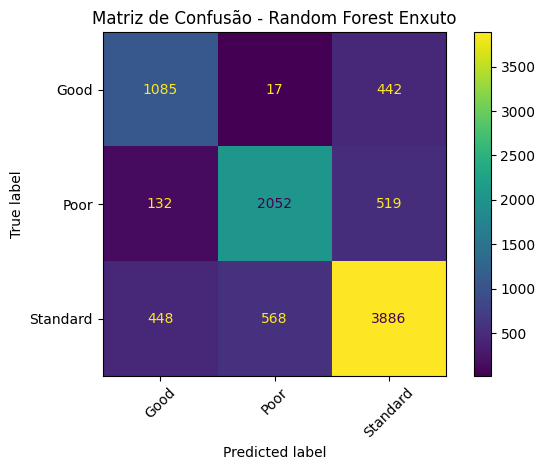

In [46]:
# Bibliotecas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -----------------------------
# 1. Copiar e preparar os dados
# -----------------------------
df = df_outliers.copy()
df = df[(df['is_train'] == True) & (df['Credit_Score'].notna())]

# -----------------------------
# 2. Selecionar variáveis mais importantes (≥ 0.005)
# -----------------------------
features_selecionadas = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance', 'Month_numeric', 'Credit_History_Age_Months',
    'Credit_Mix', 'Payment_of_Min_Amount'
]

X = df[features_selecionadas].copy()
y = df['Credit_Score']

# -----------------------------
# 3. Separar treino e teste (80/20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Separar colunas numéricas e categóricas
# -----------------------------
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64', 'Int64', 'bool']).columns.tolist()

# -----------------------------
# 5. Pré-processamento
# -----------------------------
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# -----------------------------
# 6. Pipeline com Random Forest
# -----------------------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# -----------------------------
# 7. Ajuste de hiperparâmetros
# -----------------------------
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# -----------------------------
# 8. Avaliação
# -----------------------------
y_pred = grid_search_rf.predict(X_test)

print("✅ Acurácia:", accuracy_score(y_test, y_pred))
print("\n📊 Relatório de Classificação:\n", classification_report(y_test, y_pred))

# -----------------------------
# 9. Matriz de Confusão
# -----------------------------
cm = confusion_matrix(y_test, y_pred, labels=grid_search_rf.best_estimator_.named_steps['model'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.named_steps['model'].classes_)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusão - Random Forest Enxuto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**APLICAÇAO DO MODELO NA BASE SEM INFORMAÇÃO DE CREDIT SCORE**

In [33]:
# -----------------------------
# 1. Selecionar a base de teste original
# -----------------------------
df_test_real = df_outliers[df_outliers['is_train'] == False].copy()

# -----------------------------
# 2. Selecionar as mesmas variáveis usadas no modelo enxuto
# -----------------------------
features_selecionadas = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance', 'Month_numeric', 'Credit_History_Age_Months',
    'Credit_Mix', 'Payment_of_Min_Amount'
]

X_test_real = df_test_real[features_selecionadas].copy()

# -----------------------------
# 3. Prever os scores com o modelo já treinado (grid_search)
# -----------------------------
y_test_pred = grid_search.predict(X_test_real)

# -----------------------------
# 4. Adicionar as previsões ao DataFrame de teste
# -----------------------------
df_test_real['Predicted_Credit_Score'] = y_test_pred

# -----------------------------
# 5. Visualizar algumas previsões
# -----------------------------
df_test_real[['Predicted_Credit_Score'] + features_selecionadas].head()


,Predicted_Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_numeric,Credit_History_Age_Months,Credit_Mix,Payment_of_Min_Amount
100001,Good,24,19114.12,1824.843333,3,4,0.03,4,3,9,4,809.98,33.053114,49.574949,21.465380,361.444004,10,274,Good,No
100002,Good,24,19114.12,1824.843333,3,4,0.03,4,-1,4,4,809.98,33.811894,49.574949,148.233938,264.675446,11,<NA>,Good,No
100004,Good,28,34847.84,3037.986667,2,4,0.06,1,3,1,5,605.03,25.926822,18.816215,39.684018,485.298434,9,327,Good,No
100005,Good,28,34847.84,3037.986667,2,4,0.06,1,3,3,5,605.03,30.116600,18.816215,251.627369,303.355083,10,328,Good,No
100007,Good,28,34847.84,3037.986667,2,4,0.06,1,3,2,5,605.03,33.875167,18.816215,153.534488,421.447964,12,330,Unknown,No


**XGBoost**

<ipython-input-34-2149900498>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.astype(object).replace({pd.NA: np.nan})


Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Acurácia: 0.7330855831238386

📊 Relatório de Classificação:
               precision    recall  f1-score   support

        Good       0.62      0.64      0.63      1544
        Poor       0.74      0.71      0.72      2703
    Standard       0.77      0.77      0.77      4902

    accuracy                           0.73      9149
   macro avg       0.71      0.71      0.71      9149
weighted avg       0.73      0.73      0.73      9149



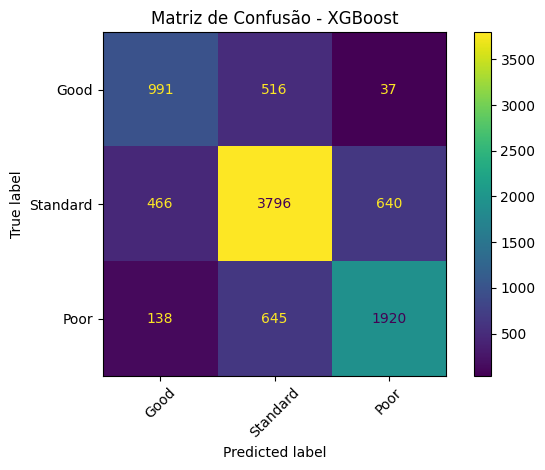

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# -----------------------------
# 1. Preparar os dados
# -----------------------------
df = df_outliers.copy()
df = df[df['is_train'] == True].dropna(subset=['Credit_Score'])

# -----------------------------
# 2. Codificar y manualmente
# -----------------------------
class_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
inverse_class_map = {v: k for k, v in class_map.items()}

X = df.drop(columns=['Credit_Score', 'is_train', 'Loan_List'], errors='ignore')
y = df['Credit_Score'].map(class_map)

# -----------------------------
# 3. Substituir pd.NA por np.nan
# -----------------------------
X = X.astype(object).replace({pd.NA: np.nan})

# -----------------------------
# 4. Separar treino e teste
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 5. Pré-processamento
# -----------------------------
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64', 'Int64', 'bool']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# -----------------------------
# 6. Pipeline com XGBoost
# -----------------------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(random_state=42, eval_metric='mlogloss'))
])

# -----------------------------
# 7. Ajuste de hiperparâmetros
# -----------------------------
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# -----------------------------
# 8. Avaliação no conjunto de teste
# -----------------------------
y_pred = grid_search.predict(X_test)
y_pred_labels = pd.Series(y_pred).map(inverse_class_map)
y_test_labels = y_test.map(inverse_class_map)

print("✅ Acurácia:", accuracy_score(y_test_labels, y_pred_labels))
print("\n📊 Relatório de Classificação:\n", classification_report(y_test_labels, y_pred_labels))

# -----------------------------
# 9. Matriz de confusão
# -----------------------------
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['Good', 'Standard', 'Poor'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Standard', 'Poor'])
disp.plot(cmap='viridis')
plt.title("Matriz de Confusão - XGBoost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**IMPORTÂNCIA DAS VARIÃVEIS NO XGBOOSTING**

<ipython-input-35-2221608732>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance.head(20), x='Importance', y='Feature', palette='viridis')


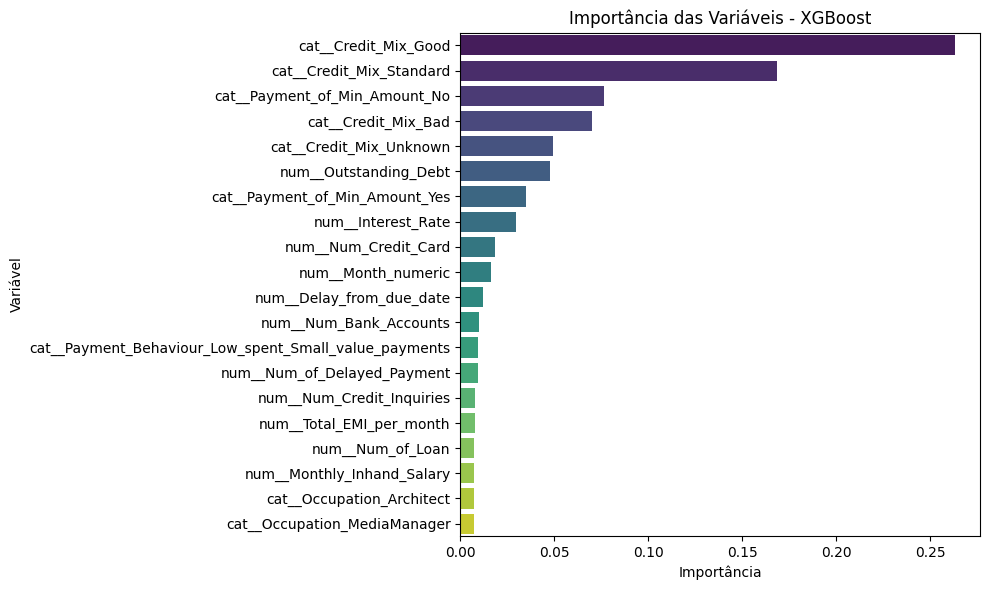

📋 Tabela de Importância das Variáveis:


,Feature,Importance
34,cat__Credit_Mix_Good,0.263216
35,cat__Credit_Mix_Standard,0.168193
38,cat__Payment_of_Min_Amount_No,0.076399
33,cat__Credit_Mix_Bad,0.069747
36,cat__Credit_Mix_Unknown,0.049256
10,num__Outstanding_Debt,0.047471
39,cat__Payment_of_Min_Amount_Yes,0.034753
5,num__Interest_Rate,0.029307
4,num__Num_Credit_Card,0.018621
15,num__Month_numeric,0.016348


In [35]:

# 1. Obter os nomes das features após o OneHot + Scaler
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# 2. Obter as importâncias das variáveis do modelo XGBoost
importances = grid_search.best_estimator_.named_steps['model'].feature_importances_

# 3. Criar DataFrame com as importâncias
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Visualizar gráfico das 20 variáveis mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importance.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Importância das Variáveis - XGBoost')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

# 5. Exibir a tabela completa
print("📋 Tabela de Importância das Variáveis:")
display(df_importance)


**MODELO XGBOOST ENXUTO**

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:36:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Acurácia: 0.7663132582795934

📊 Relatório de Classificação:
               precision    recall  f1-score   support

        Good       0.68      0.69      0.69      1544
        Poor       0.77      0.76      0.76      2703
    Standard       0.79      0.79      0.79      4902

    accuracy                           0.77      9149
   macro avg       0.75      0.75      0.75      9149
weighted avg       0.77      0.77      0.77      9149



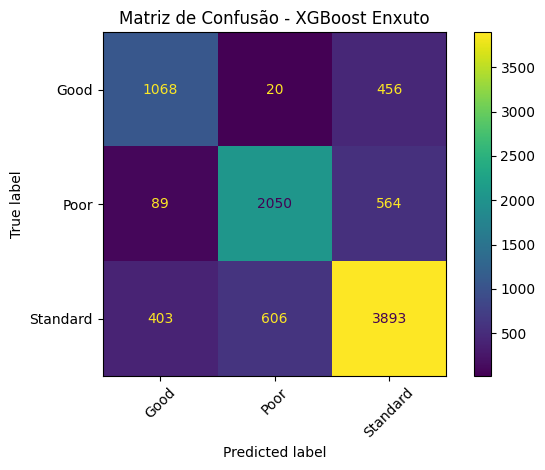

In [47]:
# Bibliotecas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -----------------------------
# 1. Preparar os dados
# -----------------------------
df = df_outliers.copy()
df = df[(df['is_train'] == True) & (df['Credit_Score'].notna())]

# -----------------------------
# 2. Selecionar variáveis importantes
# -----------------------------
features_enxutas = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance', 'Month_numeric', 'Credit_History_Age_Months',
    'Credit_Mix', 'Payment_of_Min_Amount'
]

X = df[features_enxutas].copy()
y = df['Credit_Score'].copy()

# -----------------------------
# 3. Codificar os rótulos
# -----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -----------------------------
# 4. Separar treino e teste
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -----------------------------
# 5. Identificar colunas
# -----------------------------
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64', 'Int64', 'bool']).columns.tolist()

# -----------------------------
# 6. Pré-processamento
# -----------------------------
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# -----------------------------
# 7. Pipeline com XGBoost
# -----------------------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# -----------------------------
# 8. GridSearchCV
# -----------------------------
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.1, 0.3]
}

grid_search_xgb = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# -----------------------------
# 9. Avaliação
# -----------------------------
y_pred = grid_search_xgb.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

print("✅ Acurácia:", accuracy_score(y_test, y_pred))
print("\n📊 Relatório de Classificação:\n", classification_report(y_test_labels, y_pred_labels))

# -----------------------------
# 10. Matriz de Confusão
# -----------------------------
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusão - XGBoost Enxuto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Curva Precision-Recall - multiclasse OvR**

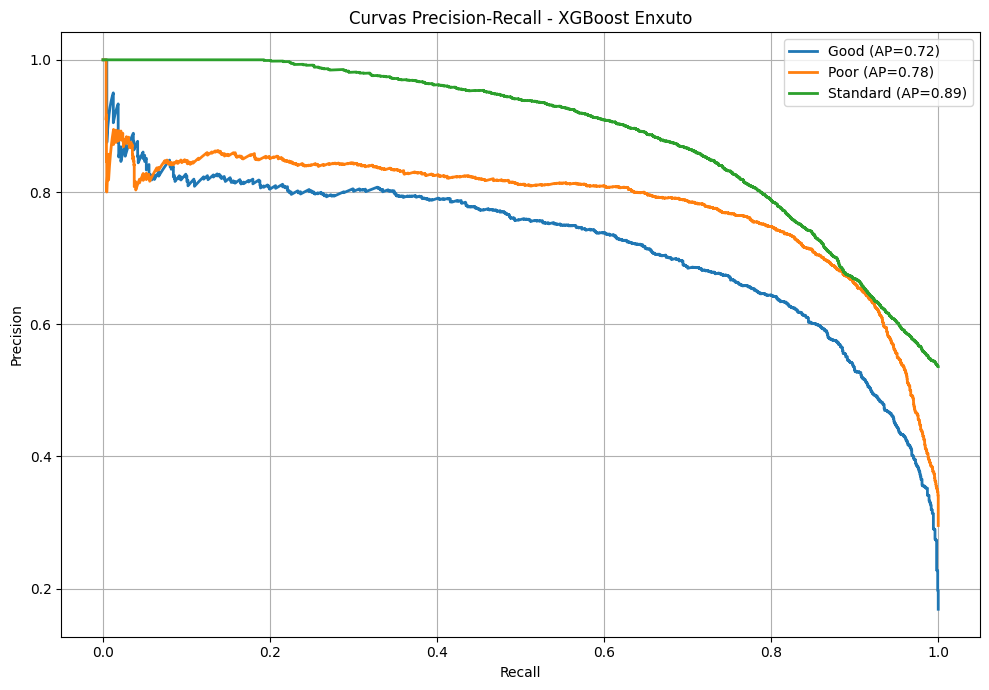

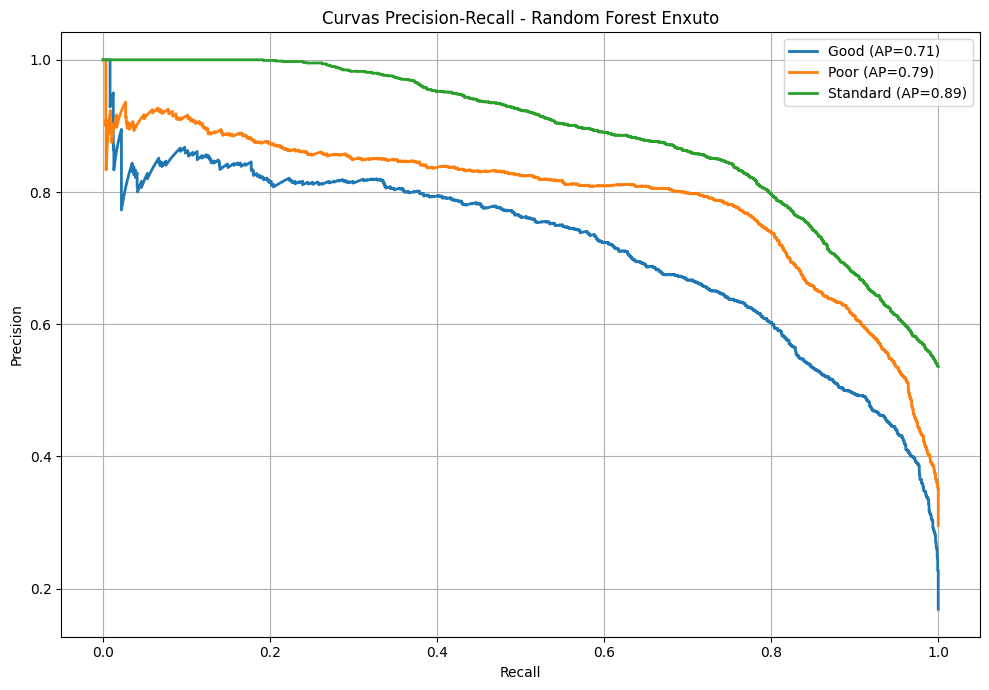

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# -----------------------------
# 1. Definir as classes
# -----------------------------
classes = le.classes_.tolist()  # ['Good', 'Poor', 'Standard']
y_test_bin = label_binarize(y_test_labels, classes=classes)

# -----------------------------
# 2. Função para plotar a curva
# -----------------------------
def plot_precision_recall_curves(y_test_bin, y_score, modelo_nome, classes):
    n_classes = y_test_bin.shape[1]
    plt.figure(figsize=(10, 7))

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'{classes[i]} (AP={ap:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curvas Precision-Recall - {modelo_nome}")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# 3. Previsões probabilísticas
# -----------------------------

# XGBoost Enxuto
y_score_xgb = grid_search_xgb.predict_proba(X_test)
plot_precision_recall_curves(y_test_bin, y_score_xgb, "XGBoost Enxuto", classes)

# Random Forest Enxuto
y_score_rf = grid_search_rf.predict_proba(X_test)
plot_precision_recall_curves(y_test_bin, y_score_rf, "Random Forest Enxuto", classes)


In [32]:
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
#print(df_full_1['Changed_Credit_Limit'].dtype)
df_full_1['Annual_Income'].unique()
#df_full['Delay_from_due_date'].value_counts()
#df_full_1.Credit_Score.isna().sum()
#df_full_1 = df_full.drop(["Changed_Credit_Limit"], axis=1, errors="ignore")

#df_full_1.head()
#df_full_1.describe()
#print(df_full_1['Payment_Behaviour'].unique())
df_full_1.info()
#print(df_full_1['Credit_History_Age_Months'].dtype)
#df_full_1.isna().sum()
#print(df_full_1['Num_of_Delayed_Payment'].describe())

#non_numeric = df_full_1[pd.to_numeric(df_full_1['Credit_Score'], errors='coerce').isna()]
#print(non_numeric['Credit_Score'].unique()) #Não existe valores não númericos